In [24]:
from qaoa import QAOA, problems, mixers, initialstates
import maxcut   
import numpy as np
import math
import matplotlib.pyplot as plt
import util 
import vqe_class
import ansatz_circ
from qiskit.primitives import Estimator,Sampler
from qiskit_aer import AerSimulator
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mpl
from matplotlib import animation

from qiskit.algorithms.optimizers import COBYLA,NFT,GradientDescent,ADAM
from plotroutines import *

In [25]:
import qaoa
print(qaoa.__file__)

c:\Users\rubenb\AppData\Local\Programs\Python\Python311\Lib\site-packages\qaoa\__init__.py


In [26]:
shots=10000

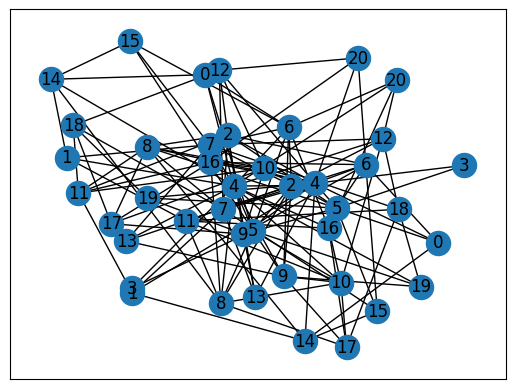

In [27]:

graph= nx.read_gml("w_ba_n21_k4_0.gml")
nx.draw_networkx(graph)
#mincost = -8.657714089848158  # precalculated
max = 25.23404480588015
n_vertex=21
sum=0
for edge in graph.edges():
    sum+=graph.edges[edge]['weight']
G=graph
nx.draw_networkx(graph)


In [30]:
gw_cut=util.gw_cut(graph)

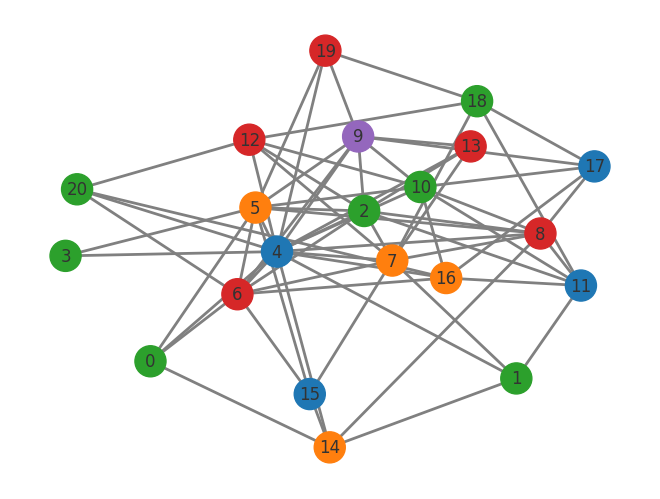

In [33]:
graph_coloring = nx.greedy_color(graph)

unique_colors = set(graph_coloring.values())

# Assign colors to nodes based on the greedy coloring
graph_color_to_mpl_color = dict(zip(unique_colors, mpl.TABLEAU_COLORS))
node_colors = [graph_color_to_mpl_color[graph_coloring[n]] for n in graph.nodes()]

pos = nx.spring_layout(graph, seed=14)
nx.draw(
    graph,
    pos,
    with_labels=True,
    node_size=500,
    node_color=node_colors,
    edge_color="grey",
    font_size=12,
    font_color="#333333",
    width=2,
)
plt.show()

In [34]:
nft=NFT(maxiter=1000, maxfev=1024, disp=False, reset_interval=1000, options=None)
cobyla=COBYLA(maxiter=1000, disp=True, rhobeg=0.01, tol=0.01, options=None)
adam=ADAM(maxiter=300, tol=1e-02, lr=0.5, beta_1=0.98, beta_2=0.99, noise_factor=1e-08, eps=1e-2, amsgrad=True, snapshot_dir=None)
g_d=GradientDescent(maxiter=300,learning_rate=0.01, tol=0.01, callback=None, perturbation=None)
estimator_dens= AerSimulator(method='density_matrix')
estimator_state= AerSimulator(method='statevector')
estimator = Estimator()
sampler = Sampler()
optimizer=cobyla

In [48]:
beta=1
v=gw_cut

gamma=0
n_vertex=len(graph.nodes())
n_qubits=math.ceil(math.log2(n_vertex))
print(util.operator_vertex(graph))
num_qubits=len(util.operator_vertex(graph)[0][0])
alpha=2

ans_ent=ansatz_circ.ansatz_efficient(num_qubits,4)
ans=ansatz_circ.sep_ansatz(graph,3 )
circuits=ansatz_circ.multibasis_ansatz(ans)
circuits_ent=ansatz_circ.multibasis_ansatz(ans_ent)

4
2
4
2
7
2
5
2
<function graph_to_paulis_qrao at 0x000002696D3EE340>
[['IIIIIYIII', 2], ['IIIIXIIII', 2], ['IIIIXXIII', 2], ['XIIIIIIII', 2], ['IIXIIIIII', 2], ['IIIIIIXII', 2], ['IIYIIIIII', 2], ['IIIIIIYII', 2], ['IIIIIIIIZ', 1], ['IIIIYIIII', 2], ['YIIIIIIII', 2], ['IIIIIIZII', 2], ['IIIIIIIXI', 2], ['IIIXIIIII', 2], ['IXIIIIIII', 2], ['IIZIIIIII', 2], ['ZIIIIIIII', 2], ['IIIIZIIII', 2], ['IIIIIIIYI', 2], ['IIIIIZIII', 2], ['IIIIIXIII', 2]]
[['IIIIIYIII', 2], ['IIIIXIIII', 2], ['IIIIXXIII', 2], ['XIIIIIIII', 2], ['IIXIIIIII', 2], ['IIIIIIXII', 2], ['IIYIIIIII', 2], ['IIIIIIYII', 2], ['IIIIIIIIZ', 1], ['IIIIYIIII', 2], ['YIIIIIIII', 2], ['IIIIIIZII', 2], ['IIIIIIIXI', 2], ['IIIXIIIII', 2], ['IXIIIIIII', 2], ['IIZIIIIII', 2], ['ZIIIIIIII', 2], ['IIIIZIIII', 2], ['IIIIIIIYI', 2], ['IIIIIZIII', 2], ['IIIIIXIII', 2]]
4
2
4
2
7
2
5
2
<function graph_to_paulis_qrao at 0x000002696D3EE340>
[['IIIIIYIII', 2], ['IIIIXIIII', 2], ['IIIIXXIII', 2], ['XIIIIIIII', 2], ['IIXIIIIII', 2], ['IIIIIIXII

c:\Users\rubenb\AppData\Local\Programs\Python\Python311\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


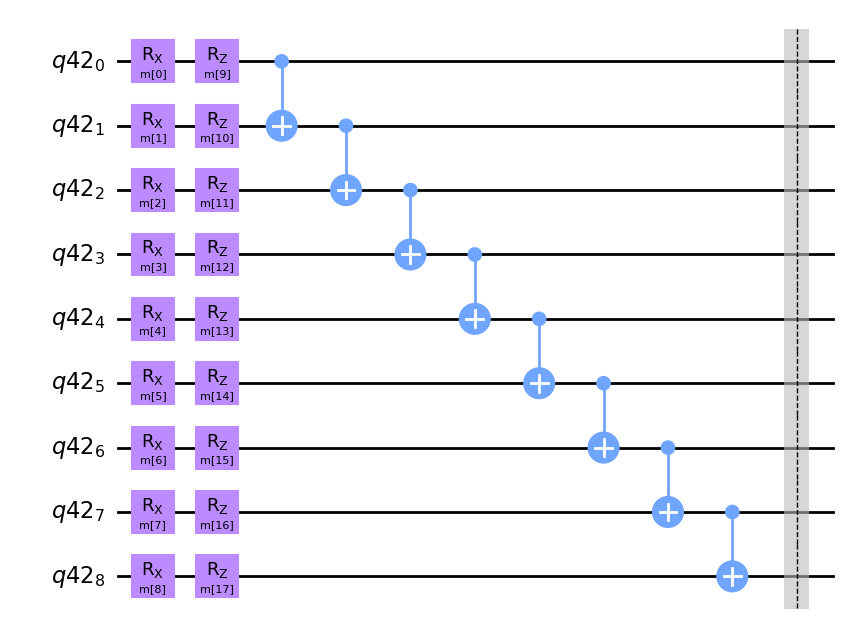

In [49]:
from qiskit import transpile
transpile(ansatz_circ.ansatz_efficient(num_qubits,1),basis_gates=['cx','h','rx','ry','rz']).draw(output='mpl')

4
2
4
2
7
2
5
2
9


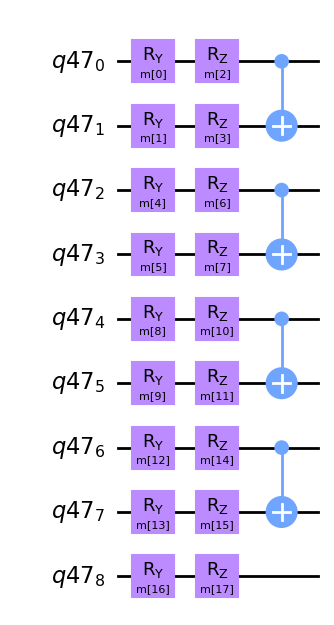

In [50]:
transpile(ansatz_circ.sep_ansatz(graph,1),basis_gates=['cx','h','rx','ry','rz']).draw(output='mpl')

In [38]:
cobyla=COBYLA(maxiter=3000, disp=True, rhobeg=1, tol=0.01, options=None)
intermediate_info_ham= []
def callback(data):
    intermediate_info_ham.append(data)
x0 = None
qrao=vqe_class.QRAO_encoding_VQE(estimator,sampler, circuits, cobyla,graph,min,shots=shots,initial_parameters=x0,callback=callback)
result_qrao= qrao.compute_minimum_eigenvalue(min)

4
2
4
2
7
2
5
2
<function graph_to_paulis_qrao at 0x000002696D3EE340>
[['IIIIIYIII', 2], ['IIIIXIIII', 2], ['IIIIXXIII', 2], ['XIIIIIIII', 2], ['IIXIIIIII', 2], ['IIIIIIXII', 2], ['IIYIIIIII', 2], ['IIIIIIYII', 2], ['IIIIIIIIZ', 1], ['IIIIYIIII', 2], ['YIIIIIIII', 2], ['IIIIIIZII', 2], ['IIIIIIIXI', 2], ['IIIXIIIII', 2], ['IXIIIIIII', 2], ['IIZIIIIII', 2], ['ZIIIIIIII', 2], ['IIIIZIIII', 2], ['IIIIIIIYI', 2], ['IIIIIZIII', 2], ['IIIIIXIII', 2]]
[SparsePauliOp(['IIIIIYIII'],
              coeffs=[1.41421356+0.j]), SparsePauliOp(['IIIIXIIII'],
              coeffs=[1.41421356+0.j]), SparsePauliOp(['IIIIXXIII'],
              coeffs=[1.41421356+0.j]), SparsePauliOp(['XIIIIIIII'],
              coeffs=[1.41421356+0.j]), SparsePauliOp(['IIXIIIIII'],
              coeffs=[1.41421356+0.j]), SparsePauliOp(['IIIIIIXII'],
              coeffs=[1.41421356+0.j]), SparsePauliOp(['IIYIIIIII'],
              coeffs=[1.41421356+0.j]), SparsePauliOp(['IIIIIIYII'],
              coeffs=[1.41421356+0.j])

In [40]:
energies_pauli_ham=[]
para_ham=[]
exp_vertex=[]
for info in intermediate_info_ham:
    energies_pauli_ham.append((-np.array(info[0])+sum/2)/max)
    para_ham.append(np.array(info[1])/max)
    exp_vertex.append(info[2])

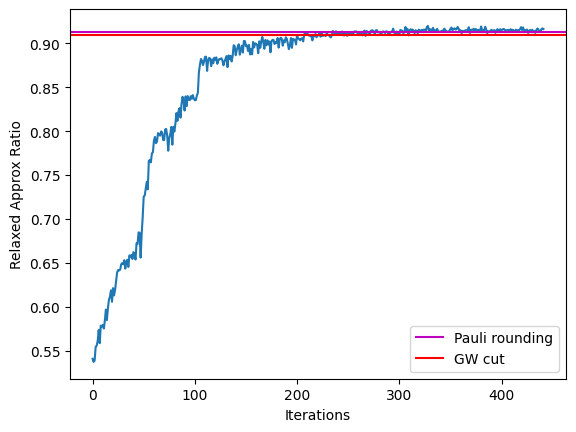

In [41]:
plt.xlabel('Iterations')
plt.ylabel('Relaxed Approx Ratio')
plt.plot(energies_pauli_ham)
plt.axhline(y=result_qrao.eigenvalue/max, xmin=0.0, xmax=1.0, color='m', label='Pauli rounding')
plt.axhline(y=0.91, xmin=0.0, xmax=1.0, color='r', label='GW cut')
plt.legend()
plt.show()

In [51]:

new_init_init=None

cobyla=COBYLA(maxiter=3000, disp=True, rhobeg=1, tol=0.01, options=None)
intermediate_info_ham_ent= []
def callback(data):
    intermediate_info_ham_ent.append(data)
qrao=vqe_class.QRAO_encoding_VQE(estimator,sampler, circuits_ent, cobyla,graph,min,shots=shots,initial_parameters=new_init_init,callback=callback)
result_qrao_ent= qrao.compute_minimum_eigenvalue(min)

4
2
4
2
7
2
5
2
<function graph_to_paulis_qrao at 0x000002696D3EE340>
[['IIIIIYIII', 2], ['IIIIXIIII', 2], ['IIIIXXIII', 2], ['XIIIIIIII', 2], ['IIXIIIIII', 2], ['IIIIIIXII', 2], ['IIYIIIIII', 2], ['IIIIIIYII', 2], ['IIIIIIIIZ', 1], ['IIIIYIIII', 2], ['YIIIIIIII', 2], ['IIIIIIZII', 2], ['IIIIIIIXI', 2], ['IIIXIIIII', 2], ['IXIIIIIII', 2], ['IIZIIIIII', 2], ['ZIIIIIIII', 2], ['IIIIZIIII', 2], ['IIIIIIIYI', 2], ['IIIIIZIII', 2], ['IIIIIXIII', 2]]
[SparsePauliOp(['IIIIIYIII'],
              coeffs=[1.41421356+0.j]), SparsePauliOp(['IIIIXIIII'],
              coeffs=[1.41421356+0.j]), SparsePauliOp(['IIIIXXIII'],
              coeffs=[1.41421356+0.j]), SparsePauliOp(['XIIIIIIII'],
              coeffs=[1.41421356+0.j]), SparsePauliOp(['IIXIIIIII'],
              coeffs=[1.41421356+0.j]), SparsePauliOp(['IIIIIIXII'],
              coeffs=[1.41421356+0.j]), SparsePauliOp(['IIYIIIIII'],
              coeffs=[1.41421356+0.j]), SparsePauliOp(['IIIIIIYII'],
              coeffs=[1.41421356+0.j])

In [52]:
energies_pauli_ham=[]
para_ham=[]
for info in intermediate_info_ham_ent:
    energies_pauli_ham.append((-np.array(info[0])+sum/2)/max)
    para_ham.append(np.array(info[1])/max)

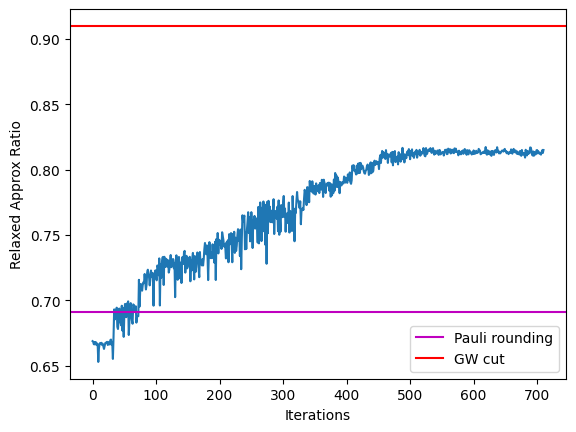

In [53]:
plt.xlabel('Iterations')
plt.ylabel('Relaxed Approx Ratio')
plt.plot(energies_pauli_ham)
plt.axhline(y=result_qrao_ent.eigenvalue/max, xmin=0.0, xmax=1.0, color='m', label='Pauli rounding')
plt.axhline(y=0.91, xmin=0.0, xmax=1.0, color='r', label='GW cut')
plt.legend()
plt.show()

In [54]:
alpha=2
v=gw_cut
gamma=0
cobyla=COBYLA(maxiter=1000, disp=True, rhobeg=1, tol=0.01, options=None)
intermediate_info_init= []
def callback(data):
    intermediate_info_init.append(data)
qrao=vqe_class.QRAO_initial_state_VQE(graph,sampler,circuits,cobyla,gw_cut,alpha,beta,v,gamma,shots=shots,initial_parameters=None,callback=callback)
result_init=qrao.compute_minimum_eigenvalue(min)
new_init_init=result_init.optimal_parameters
v=0
gamma=0
cobyla=COBYLA(maxiter=3000, disp=True, rhobeg=0.1, tol=0.01, options=None)
intermediate_info_qrao= []
def callback(data):
    intermediate_info_qrao.append(data)
qrao=vqe_class.QRAO_efficient_VQE(graph,sampler,circuits,cobyla,gw_cut,alpha,beta,v,gamma,shots=shots,initial_parameters=new_init_init,callback=callback)
result_qrao= qrao.compute_minimum_eigenvalue(min)
new_init=result_qrao.optimal_parameters
v=gw_cut/2
gamma=1
cobyla=COBYLA(maxiter=3000, disp=True, rhobeg=0.1, tol=0.01, options=None)
#intermediate_info_qrao= []
def callback(data):
    intermediate_info_qrao.append(data)
qrao=vqe_class.QRAO_efficient_VQE(graph,sampler,circuits,cobyla,gw_cut,alpha,beta,v,gamma,shots=shots,initial_parameters=new_init,callback=callback)
result_qrao= qrao.compute_minimum_eigenvalue(min)


v=gw_cut
gamma=0
cobyla=COBYLA(maxiter=3000, disp=True, rhobeg=0.05, tol=0.01, options=None)
intermediate_info_qrao_non_linear= []
def callback(data):
    intermediate_info_qrao_non_linear.append(data)
qrao=vqe_class.QRAO_nonlinear_VQE(graph,sampler,circuits,cobyla,gw_cut,alpha,beta,v,gamma,shots=shots,initial_parameters=new_init_init,callback=callback)
result_qrao_non= qrao.compute_minimum_eigenvalue(min)
new_init=result_qrao_non.optimal_parameters
v=gw_cut/2
gamma=1

cobyla=COBYLA(maxiter=3000, disp=True, rhobeg=0.05, tol=0.01, options=None)
#intermediate_info_qrao_non_linear= []
def callback(data):
    intermediate_info_qrao_non_linear.append(data)
qrao=vqe_class.QRAO_nonlinear_VQE(graph,sampler,circuits,cobyla,gw_cut,alpha,beta,v,gamma,shots=shots,initial_parameters=new_init,callback=callback)
result_qrao_non= qrao.compute_minimum_eigenvalue(min)

4
2
4
2
7
2
5
2
<function graph_to_paulis_qrao at 0x000002696D3EE340>
[['IIIIIYIII', 2], ['IIIIXIIII', 2], ['IIIIXXIII', 2], ['XIIIIIIII', 2], ['IIXIIIIII', 2], ['IIIIIIXII', 2], ['IIYIIIIII', 2], ['IIIIIIYII', 2], ['IIIIIIIIZ', 1], ['IIIIYIIII', 2], ['YIIIIIIII', 2], ['IIIIIIZII', 2], ['IIIIIIIXI', 2], ['IIIXIIIII', 2], ['IXIIIIIII', 2], ['IIZIIIIII', 2], ['ZIIIIIIII', 2], ['IIIIZIIII', 2], ['IIIIIIIYI', 2], ['IIIIIZIII', 2], ['IIIIIXIII', 2]]
0.4524391654712092
0.2741408661650894
0.2539588685319286
0.3373884630653622
0.4274966063472626
0.23208293860785978
0.34934924755915314
0.2332040822548147
0.2508602790991874
0.2733855263733258
0.2318501955332807
0.23185019553328212
0.3049440146669134
0.1670418842929311
0.1071778791666897
0.33117350432365295
0.1296643149134813
0.2670565597789361
0.21938741811630888
0.1646119349074031
0.08349727043891488
0.08856160812254353
0.08530459881341575
0.06296339650343796
0.10509005241102419
0.10108072559208257
0.12226440780647017
0.12942412869524353
0.0558

KeyboardInterrupt: 

In [ ]:
mincost=-max

In [ ]:
energies_pauli_qrao=[]
reg_pauli_qrao=[]
angles_pauli_qrao=[]
expval_qrao=[]
energies_rel_qrao=[]
for info in intermediate_info_qrao:
    energies_pauli_qrao.append(-info[0]/mincost)
    reg_pauli_qrao.append(-info[1]/mincost)
    angles_pauli_qrao.append(-info[2]/mincost)
    expval_qrao.append(info[3])
    energies_rel_qrao.append(info[4]/mincost)

energies_pauli_non=[]
reg_pauli_non=[]
angles_pauli_non=[]
expval_non=[]
energies_rel_non=[]
for info in intermediate_info_qrao_non_linear:
    energies_pauli_non.append(-info[0]/mincost)
    reg_pauli_non.append(-info[1]/mincost)
    angles_pauli_non.append(-info[2]/mincost)
    expval_non.append(info[3])
    energies_rel_non.append(info[4]/mincost)

<function matplotlib.pyplot.show(close=None, block=None)>

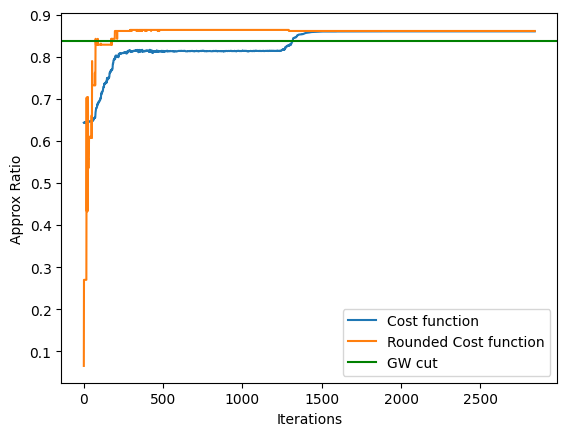

In [ ]:
plt.xlabel('Iterations')
plt.ylabel('Approx Ratio')
plt.plot(energies_rel_non, label='Cost function')
plt.plot(angles_pauli_non,label='Rounded Cost function')
plt.axhline(y=-gw_cut/mincost, xmin=0.0, xmax=1.0,color='g',label='GW cut')
plt.legend()
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

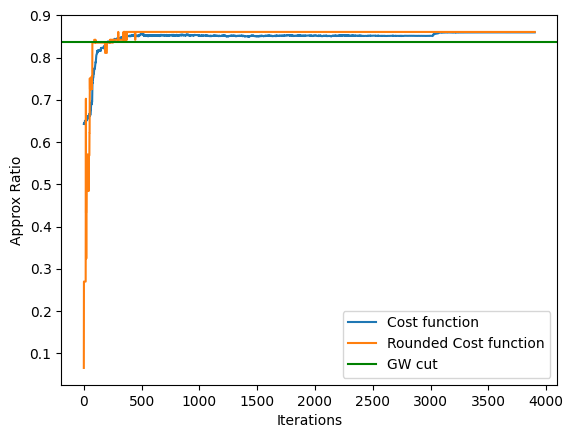

In [ ]:
plt.xlabel('Iterations')
plt.ylabel('Approx Ratio')
plt.plot(energies_rel_qrao, label='Cost function')
plt.plot(angles_pauli_qrao,label='Rounded Cost function')
plt.axhline(y=-gw_cut/mincost, xmin=0.0, xmax=1.0,color='g',label='GW cut')
plt.legend()
plt.show



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<function matplotlib.pyplot.show(close=None, block=None)>

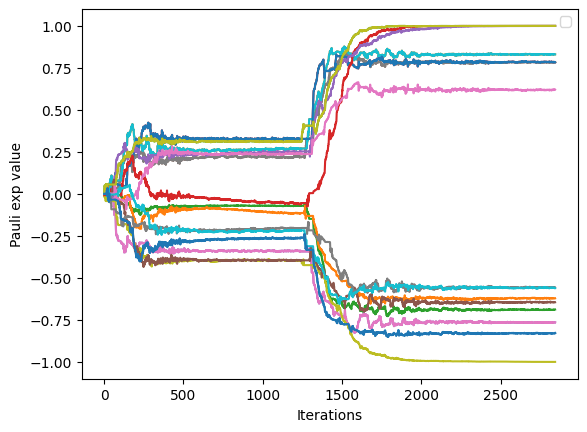

In [ ]:
plt.xlabel('Iterations')
plt.ylabel('Pauli exp value')
plt.plot(expval_non)
plt.legend()
plt.show



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<function matplotlib.pyplot.show(close=None, block=None)>

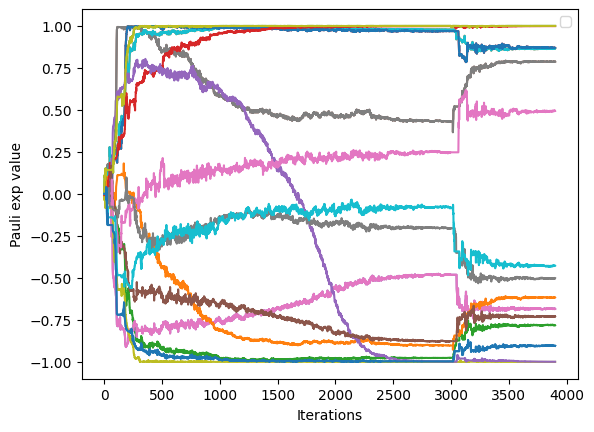

In [ ]:
plt.xlabel('Iterations')
plt.ylabel('Pauli exp value')
plt.plot(expval_qrao)
plt.legend()
plt.show



In [ ]:
gamma=0
beta=1
cobyla=COBYLA(maxiter=3000, disp=True, rhobeg=1, tol=0.01, options=None)
v=gw_cut
intermediate_info_init_ent= []
def callback(data):
    intermediate_info_init_ent.append(data)
qrao=vqe_class.QRAO_initial_state_VQE(graph,sampler,circuits_ent,cobyla,gw_cut,alpha,beta,v,gamma,shots=shots,initial_parameters=None,callback=callback)
result_init=qrao.compute_minimum_eigenvalue(min)
new_init_init=result_init.optimal_parameters



v=0
gamma=0
cobyla=COBYLA(maxiter=3000, disp=True, rhobeg=0.1, tol=0.01, options=None)
intermediate_info_qrao_ent= []
def callback(data):
    intermediate_info_qrao_ent.append(data)
qrao=vqe_class.QRAO_efficient_VQE(graph,sampler,circuits_ent,cobyla,gw_cut,alpha,beta,v,gamma,shots=shots,initial_parameters=new_init_init,callback=callback)
result_qrao_ent= qrao.compute_minimum_eigenvalue(min)
new_init=result_qrao_ent.optimal_parameters
v=gw_cut/2
gamma=1
cobyla=COBYLA(maxiter=3000, disp=True, rhobeg=0.1, tol=0.01, options=None)
qrao=vqe_class.QRAO_efficient_VQE(graph,sampler,circuits_ent,cobyla,gw_cut,alpha,beta,v,gamma,shots=shots,initial_parameters=new_init,callback=callback)
result_qrao_ent= qrao.compute_minimum_eigenvalue(min)




v=gw_cut
gamma=0
cobyla=COBYLA(maxiter=3000, disp=True, rhobeg=0.1, tol=0.01, options=None)
intermediate_info_qrao_non_linear_ent= []
def callback(data):
    intermediate_info_qrao_non_linear_ent.append(data)
qrao=vqe_class.QRAO_nonlinear_VQE(graph,sampler,circuits_ent,cobyla,gw_cut,alpha,beta,v,gamma,shots=shots,initial_parameters=new_init_init,callback=callback)
result_qrao_non_ent= qrao.compute_minimum_eigenvalue(min)
new_init=result_qrao_non_ent.optimal_parameters
v=gw_cut/2
gamma=1
cobyla=COBYLA(maxiter=3000, disp=True, rhobeg=0.1, tol=0.01, options=None)
qrao=vqe_class.QRAO_nonlinear_VQE(graph,sampler,circuits_ent,cobyla,gw_cut,alpha,beta,v,gamma,shots=shots,initial_parameters=new_init,callback=callback)
result_qrao_ent= qrao.compute_minimum_eigenvalue(min)

4
2
4
2
7
2
5
2
<function graph_to_paulis_qrao at 0x000001C6EBBB6340>
[['IIIIIYIII', 7], ['IIIIXIIII', 7], ['IIIIXXIII', 7], ['XIIIIIIII', 4], ['IIXIIIIII', 4], ['IIIIIIXII', 5], ['IIYIIIIII', 4], ['IIIIIIYII', 5], ['IIIIIIIIZ', 1], ['IIIIYIIII', 7], ['YIIIIIIII', 4], ['IIIIIIZII', 5], ['IIIIIIIXI', 5], ['IIIXIIIII', 4], ['IXIIIIIII', 4], ['IIZIIIIII', 4], ['ZIIIIIIII', 4], ['IIIIZIIII', 7], ['IIIIIIIYI', 5], ['IIIIIZIII', 7], ['IIIIIXIII', 7]]
0.001245091365234257
0.0014729067023026808
0.00247698156058281
0.0006867991135619433
0.00015706956074932308
0.00039609191364159543
0.0003546886974734657
0.0003167445380241597
0.00036462299872393785
9.089217937311052e-05
0.00010136002539950126
0.00022678256649592263
8.6735196872506e-05
0.0007507658350424421
0.00018239766491001387
0.0001957783832595623
6.790598794554279e-05
0.00012156337550115335
0.0005786272720871435
0.000277097431164966
0.0004685108756710787
0.0012085595783643357
5.8044477712860306e-05
7.852458513537407e-05
9.559830584755325e-05

In [ ]:
energies_pauli_qrao_init=[]

expval_qrao_init=[]

for info in intermediate_info_init:
    energies_pauli_qrao_init.append(-info[0]/mincost)
    expval_qrao_init.append(info[1])

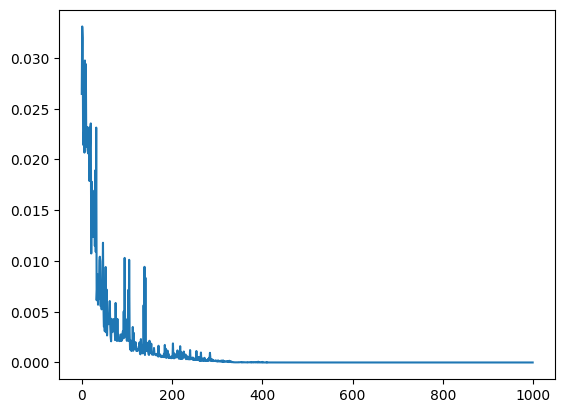

In [ ]:
plt.plot(energies_pauli_qrao_init)

Text(0, 0.5, 'Pauli exp Value')

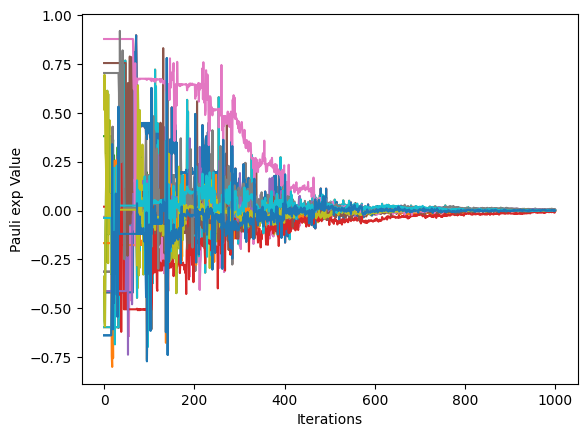

In [ ]:
plt.plot(expval_qrao_init)
plt.xlabel('Iterations')
plt.ylabel('Pauli exp Value')

In [ ]:
energies_pauli_qrao_ent=[]
reg_pauli_qrao_ent=[]
angles_pauli_qrao_ent=[]
expval_qrao_ent=[]
energies_rel_qrao_ent=[]
for info in intermediate_info_qrao_ent:
    energies_pauli_qrao_ent.append(-info[0]/mincost)
    reg_pauli_qrao_ent.append(-info[1]/mincost)
    angles_pauli_qrao_ent.append(-info[2]/mincost)
    expval_qrao_ent.append(info[3])
    energies_rel_qrao_ent.append(info[4]/mincost)



energies_pauli_non_ent=[]
reg_pauli_non_ent=[]
angles_pauli_non_ent=[]
expval_non_ent=[]
energies_rel_non_ent=[]
for info in intermediate_info_qrao_non_linear_ent:
    energies_pauli_non_ent.append(-info[0]/mincost)
    reg_pauli_non_ent.append(-info[1]/mincost)
    angles_pauli_non_ent.append(-info[2]/mincost)
    expval_non_ent.append(info[3])
    energies_rel_non_ent.append(info[4]/mincost)

<function matplotlib.pyplot.show(close=None, block=None)>

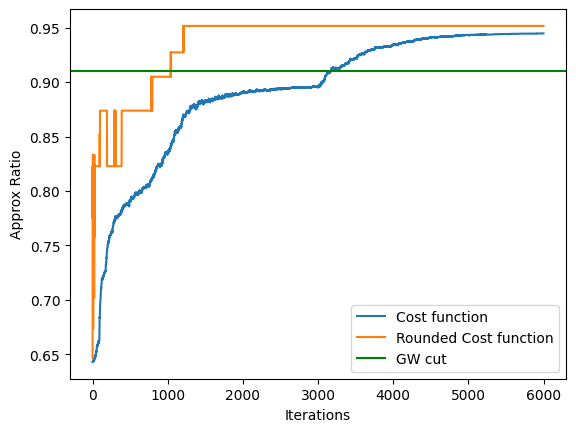

In [ ]:
plt.xlabel('Iterations')
plt.ylabel('Approx Ratio')
plt.plot(energies_rel_non_ent, label='Cost function')
plt.plot(angles_pauli_non_ent,label='Rounded Cost function')
plt.axhline(y=0.91, xmin=0.0, xmax=1.0,color='g',label='GW cut')
plt.legend()
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

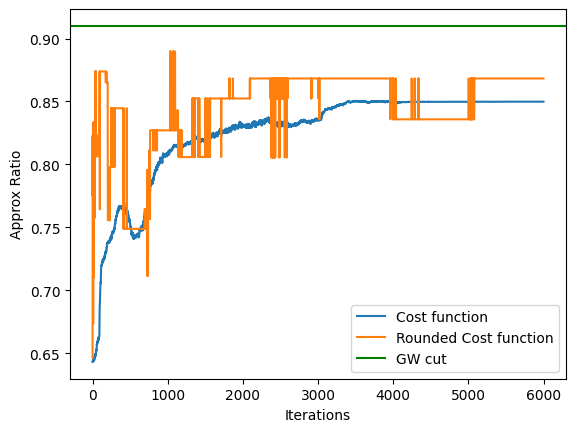

In [ ]:
plt.xlabel('Iterations')
plt.ylabel('Approx Ratio')
plt.plot(energies_rel_qrao_ent, label='Cost function')
plt.plot(angles_pauli_qrao_ent,label='Rounded Cost function')
plt.axhline(y=0.91, xmin=0.0, xmax=1.0,color='g',label='GW cut')
plt.legend()
plt.show


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<function matplotlib.pyplot.show(close=None, block=None)>

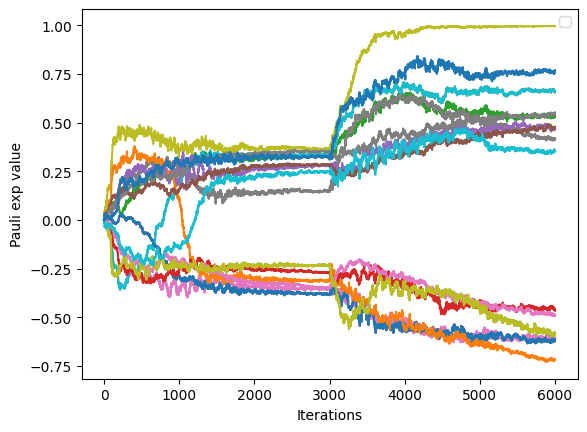

In [ ]:
plt.xlabel('Iterations')
plt.ylabel('Pauli exp value')
plt.plot(expval_non_ent)
plt.legend()
plt.show



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<function matplotlib.pyplot.show(close=None, block=None)>

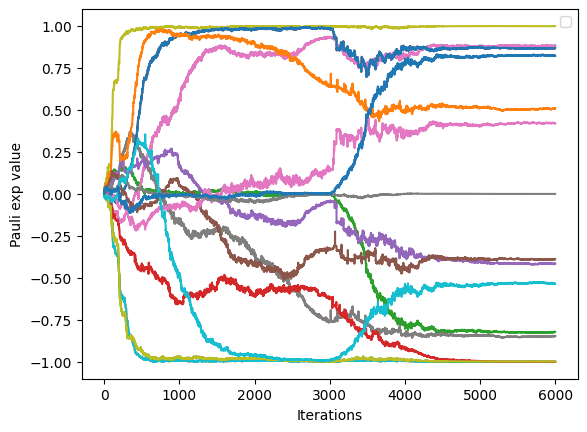

In [ ]:
plt.xlabel('Iterations')
plt.ylabel('Pauli exp value')
plt.plot(expval_qrao_ent)
plt.legend()
plt.show


2024-05-21 12:44:17 [info     ] Calculating energy landscape for depth p=1... file=qaoa.qaoa func=sample_cost_landscape
1 0


2024-05-21 12:44:17 [info     ] Executing sample_cost_landscape file=qaoa.qaoa func=sample_cost_landscape
2024-05-21 12:44:17 [info     ] parameters: 2                  file=qaoa.qaoa func=sample_cost_landscape
2024-05-21 12:44:17 [info     ] Done execute                   file=qaoa.qaoa func=sample_cost_landscape
2024-05-21 12:44:46 [info     ] Done measurement               file=qaoa.qaoa func=sample_cost_landscape
2024-05-21 12:44:46 [info     ] Calculating Energy landscape done file=qaoa.qaoa func=sample_cost_landscape


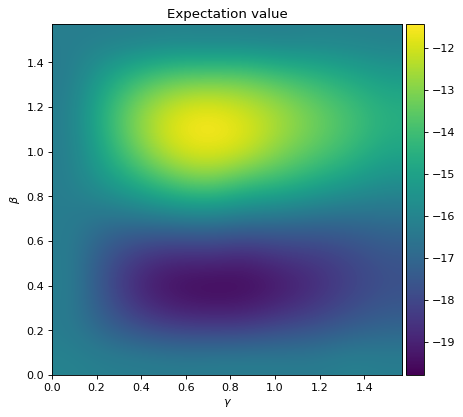

In [ ]:
qaoa = QAOA(
    initialstate=initialstates.Plus(), problem=problems.MaxCut(G=G), mixer=mixers.X()
)
qaoa.sample_cost_landscape(
    angles={"gamma": [0, np.pi / 2, 10], "beta": [0, np.pi / 2, 10]}
)
plot_E(qaoa)

In [ ]:
maxdepth=10
qaoa.optimize(depth=maxdepth)

2024-05-21 12:44:54 [info     ] cost(depth 1 = -19.899862019740215 file=qaoa.qaoa func=optimize
[0.69817924]
[0.34915383]


KeyboardInterrupt: 

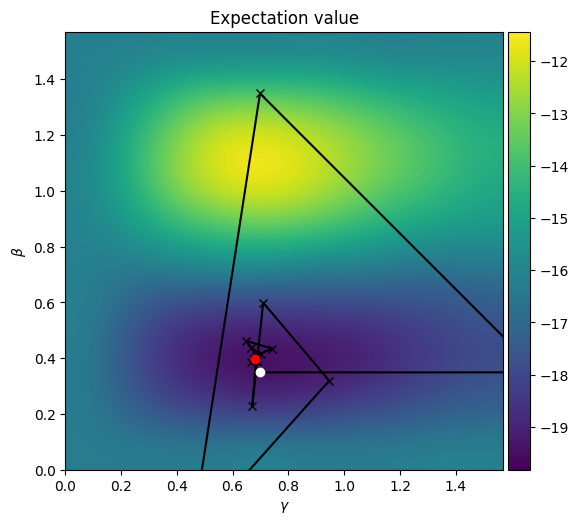

In [ ]:
fig = pl.figure(figsize=(6, 6))
gamma = []
beta = []
angles = qaoa.optimization_results[1].angles
for i in range(len(angles)):
    gamma.append(angles[i][0])
    beta.append(angles[i][1])
pl.plot(gamma, beta, "x-k")
pl.plot(gamma[0], beta[0], "wo")
pl.plot(gamma[-1], beta[-1], "or")
plot_E(qaoa, fig=fig)

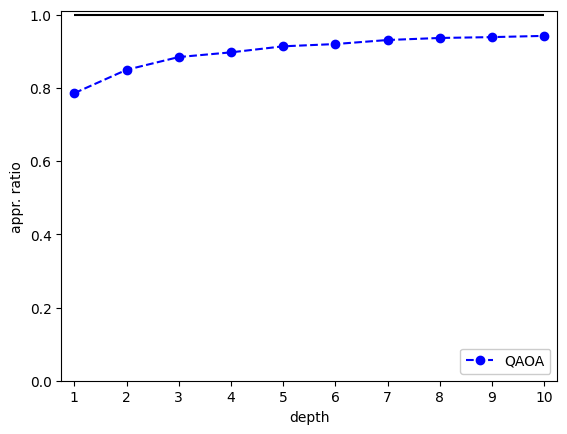

In [ ]:
fig = pl.figure()
plot_ApproximationRatio(
    qaoa,
    maxdepth,
    mincost=-max,
    maxcost=0,
    label="QAOA",
    style="o--b",
    fig=fig,
)

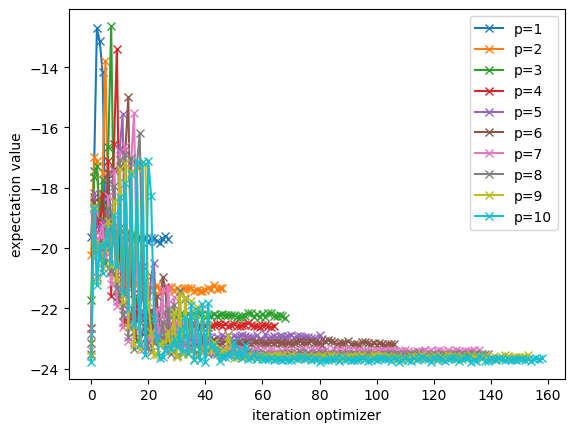

In [ ]:
for i in range(maxdepth):
    pl.plot(qaoa.optimization_results[i + 1].Exp, "x-", label="p=" + str(i + 1))
_ = pl.legend()
_ = pl.ylabel("expectation value")
_ = pl.xlabel("iteration optimizer")

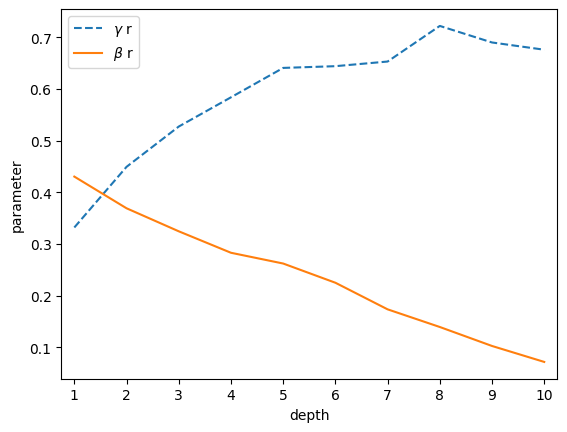

In [ ]:
p = maxdepth
fig = pl.figure(p)

plot_angles(qaoa, p, label='r',  fig=fig)